In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
kc_housing = pd.read_csv('kc_house_data.csv')
kc_housing.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [4]:
# Housing inflation correction?
# Look at potential correlation with all options
# To drop - Lat/long(or convert to neighborhood? - have ZIP code),
# ID, date (transform and just grab year)
# Potentially convert year built to age?
# Look for empty, bad, values
# Potentially log price, bedrooms? Basement
# FIgure out sqft_above
# Categorical - condition, grade (subjective?), bedrooms, bathrooms, floors,

# Primary - Size ( square living, lot), location (ZIP), Age?, 


In [5]:
# Drop some columns
kc_housing = kc_housing.drop(columns=['id', 'lat', 'long'])
kc_housing['date'] = kc_housing['date'].apply(lambda x: x[-4:])

In [6]:
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(10), object(2)
memory usage: 3.0+ MB


In [7]:
kc_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


In [8]:
kc_housing.isna().sum(), kc_housing.shape

(date                0
 price               0
 bedrooms            0
 bathrooms           0
 sqft_living         0
 sqft_lot            0
 floors              0
 waterfront       2376
 view               63
 condition           0
 grade               0
 sqft_above          0
 sqft_basement       0
 yr_built            0
 yr_renovated     3842
 zipcode             0
 sqft_living15       0
 sqft_lot15          0
 dtype: int64, (21597, 18))

In [9]:
zips = pd.get_dummies(kc_housing['zipcode'], prefix='zip')

In [10]:
zips.shape

(21597, 70)

In [11]:
kc_housing['yr_built'] = kc_housing['yr_built'].apply(lambda x: 2019 - x)
kc_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,64,0.0,98178,1340,5650
1,2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,68,1991.0,98125,1690,7639
2,2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,86,NaN,98028,2720,8062
3,2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,54,0.0,98136,1360,5000
4,2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,32,0.0,98074,1800,7503


# Column Names and descriptions for Kings County Data Set
###  * **pricePrice** -  is prediction target YES
### * **sqft_livingsquare** -  footage of the home YES
### * **sqft_lotsquare** -  footage of the lot YES
### * **zipcode** - zip YES, find way to best represent

In [12]:
kc_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,64,0.0,98178,1340,5650
1,2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,68,1991.0,98125,1690,7639
2,2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,86,NaN,98028,2720,8062
3,2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,54,0.0,98136,1360,5000
4,2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,32,0.0,98074,1800,7503


In [13]:
kc_housing.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [15]:
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(10), object(2)
memory usage: 3.0+ MB


In [17]:
kc_use = kc_housing[['price','sqft_living','sqft_lot']].copy()
kc_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
price          21597 non-null float64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


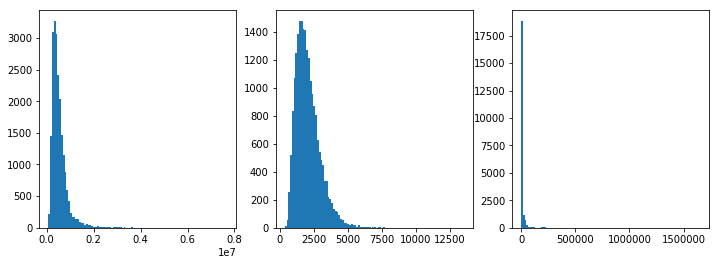

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].hist(kc_use['price'], bins=100)
ax[1].hist(kc_use['sqft_living'], bins=100)
ax[2].hist(kc_use['sqft_lot'], bins=100)
plt.show()

In [48]:
kc_use['sqft_living'].value_counts()
kc_use['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [84]:
X = kc_use.drop(['price', 'sqft_lot'], axis = 1)
y = kc_use[['price']]

In [85]:
#Linear regression with SKLearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [104]:
# Create model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
# Calculate our y hat (how our model performs against the test data held off)
y_hat_test = linreg.predict(X_test)

In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

 # See the R Squared score for on our test data
r2 = r2_score(y_test, y_hat_test)

# See our Squared Mean Error score for data
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse, r2

(65612157209.909676, 0.4809177910629586)

In [118]:
linreg.coef_

array([[282.5230189]])

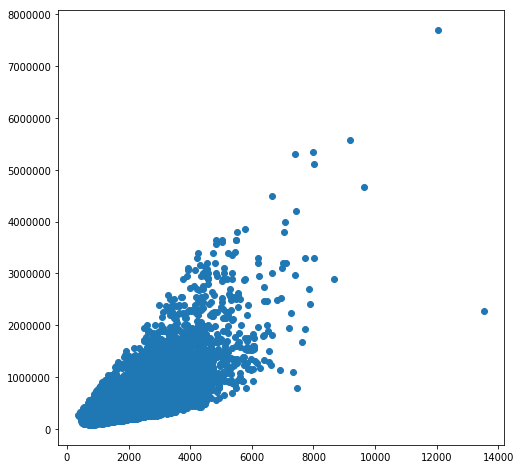

In [121]:
# Plotting
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train, y_train)


In [116]:
import statsmodels.api as sm

predictor = X_train
predictor_int = sm.add_constant(predictor) 
model = sm.OLS(y_hat_test, predictor_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.695e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:45:19   Log-Likelihood:            -2.4013e+05
No. Observations:               17277   AIC:                         4.803e+05
Df Residuals:                   17275   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.548e+04   4945.542     -9.197      0.000   -5.52e+04   -3.58e+04
sqft_living   282.5230      2.170    130.175      0.000     278.269     286.777
==============================================================================
Omnibus:                    11058.660   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           297248.627
Skew:                           2.647   Prob(JB):                         0.00
Kurtosis:                      22.619   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""